In [50]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
#inline matplotlib
from scipy import stats
from sklearn.preprocessing import QuantileTransformer
from imblearn.over_sampling import SMOTE




In [51]:
df=pd.read_csv("/Users/gayatrimanjarisahu/mlproject_diabetics/mlproject-diabetcs/notebook/data/diabetes2.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [52]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

# shows the all columns

In [53]:
df.shape

(768, 9)

In [54]:
#check the missing values
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

There is no missing values in the dataset

In [55]:
#check the duplicates
df.duplicated().sum()

np.int64(0)

There is no duplicated values

In [56]:
#check the datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


All the features are numeric types

In [57]:
#checking the number of of unique values in each column
df.nunique()

Pregnancies                  17
Glucose                     136
BloodPressure                47
SkinThickness                51
Insulin                     186
BMI                         248
DiabetesPedigreeFunction    517
Age                          52
Outcome                       2
dtype: int64

In [58]:
#check the statistics of the dataset
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [59]:
#Exploring data
df.sample(frac=0.1).head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
168,4,110,66,0,0,31.9,0.471,29,0
392,1,131,64,14,415,23.7,0.389,21,0
687,1,107,50,19,0,28.3,0.181,29,0
113,4,76,62,0,0,34.0,0.391,25,0
563,6,99,60,19,54,26.9,0.497,32,0


In [60]:
# define numerical & categorical columns
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
#categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

# print columns
print('We have {} numerical features : {}'.format(len(numeric_features), numeric_features))
#print('\nWe have {} categorical features : {}'.format(len(categorical_features), categorical_features))


We have 9 numerical features : ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']


## Data visualization

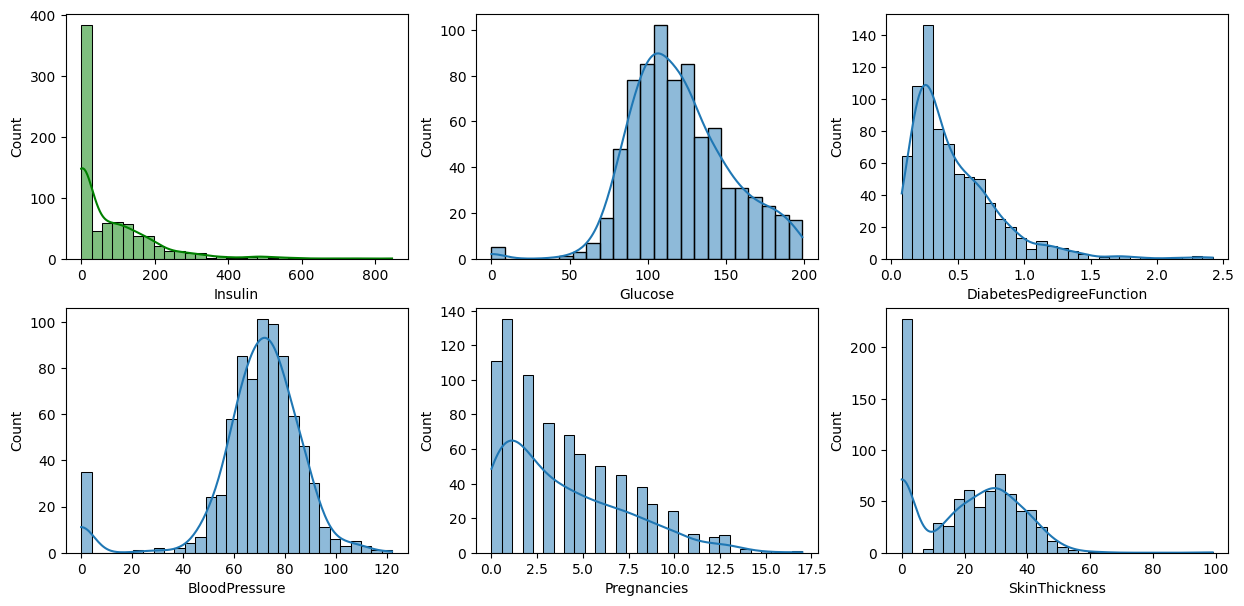

In [61]:
fig, axs = plt.subplots(2, 3, figsize=(15, 7))
plt.subplot(231)
sns.histplot(data=df,x='Insulin',bins=30,kde=True,color='g')
plt.subplot(232)
sns.histplot(data=df,x='Glucose',kde=True)
plt.subplot(233)
sns.histplot(data=df,x='DiabetesPedigreeFunction',bins=30,kde=True)
plt.subplot(234)
sns.histplot(data=df,x='BloodPressure',bins=30,kde=True)
plt.subplot(235)
sns.histplot(data=df,x='Pregnancies',bins=30,kde=True)
plt.subplot(236)
sns.histplot(data=df,x='SkinThickness',bins=30,kde=True)


plt.show()


The features Insulin,DiabetesPedigreFunction ,Pregnenciesare,Age rightly skewd

<Axes: xlabel='Age', ylabel='Count'>

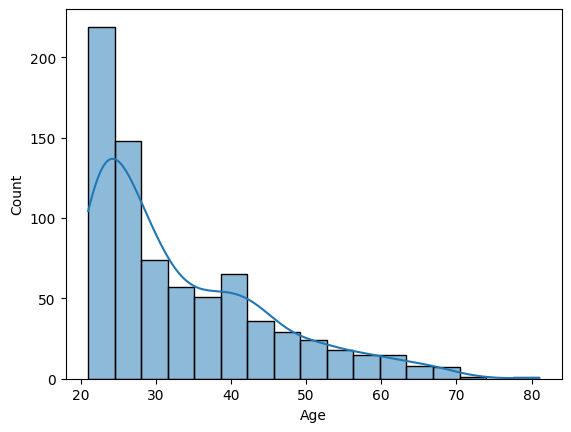

In [62]:
sns.histplot(data=df,x='Age',kde=True)


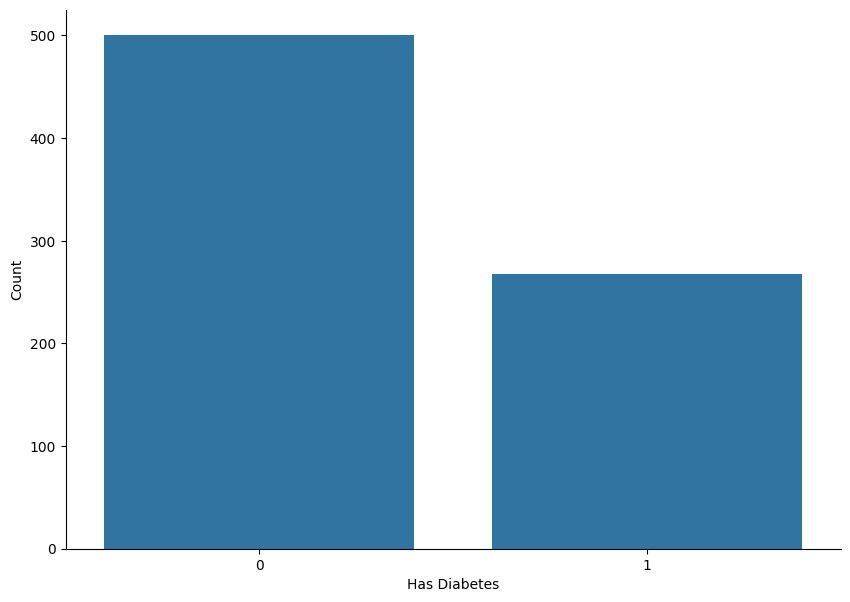

In [63]:
# Plotting the Outcomes based on the number of dataset entries
plt.figure(figsize=(10,7))
sns.countplot(x='Outcome', data=df)

# Removing the unwanted spines
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# Headings
plt.xlabel('Has Diabetes')
plt.ylabel('Count')

plt.show()

In [64]:
# Replacing the 0 values from ['Glucose','BloodPressure','SkinThickness','Insulin','BMI'] by NaN
df_copy = df.copy(deep=True)
df_copy[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = df_copy[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.nan)
df_copy.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

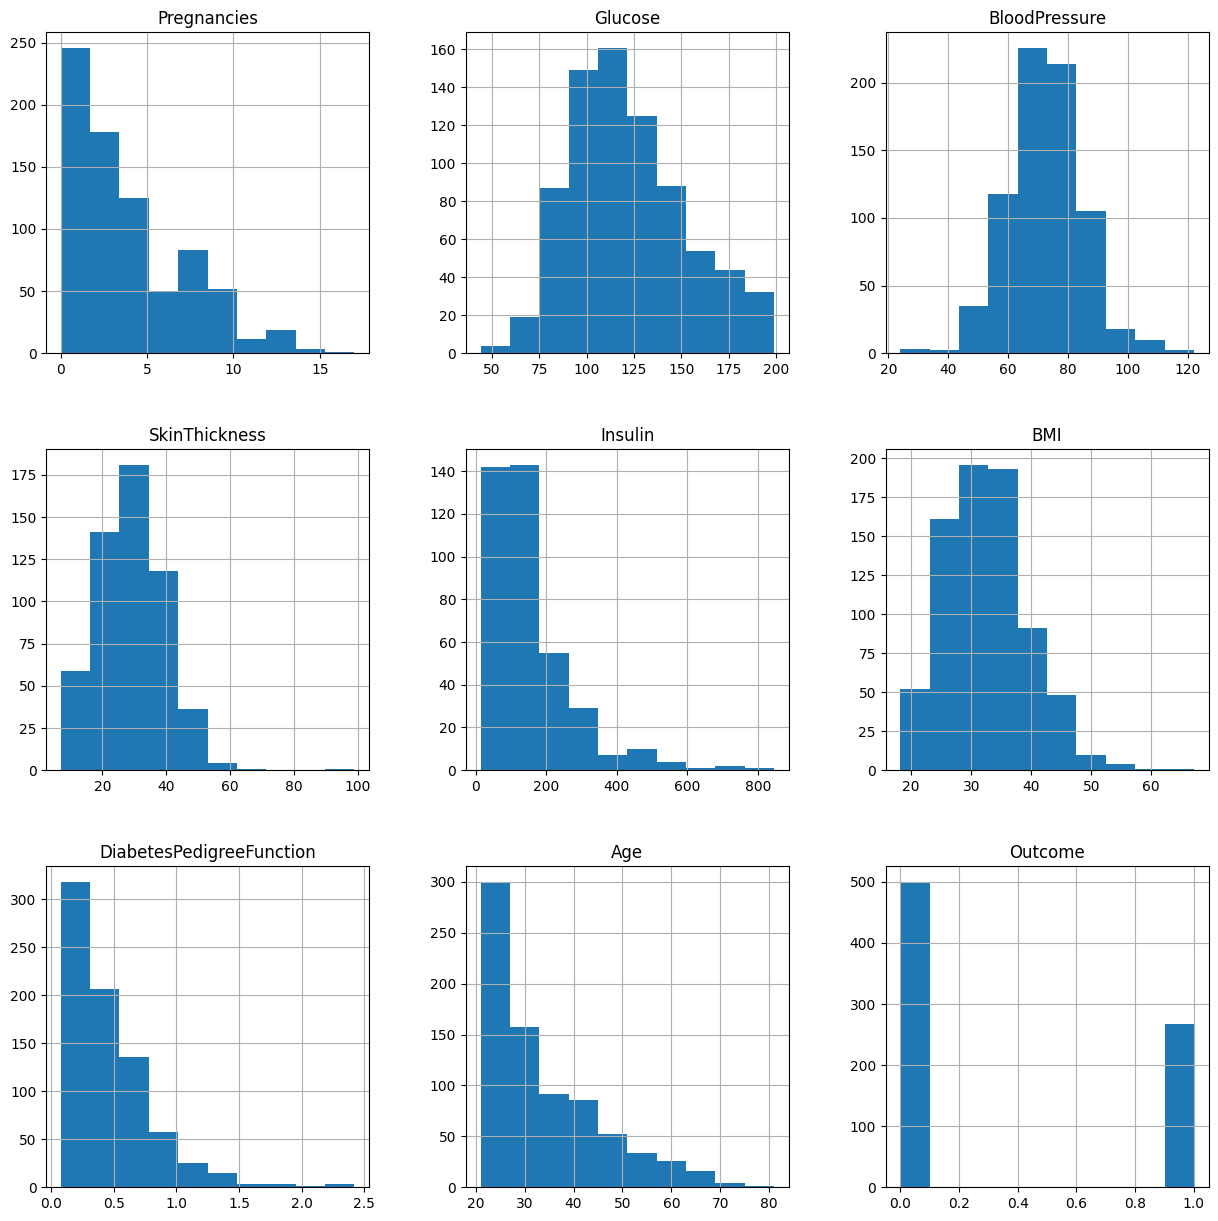

In [65]:
# To fill these Nan values the data distribution needs to be understood
# Plotting histogram of dataset before replacing NaN values
p = df_copy.hist(figsize = (15,15))


In [66]:
# Replacing NaN value by mean, median depending upon distribution
df_copy['Glucose'].fillna(df_copy['Glucose'].mean())
df_copy['BloodPressure'].fillna(df_copy['BloodPressure'].mean())
df_copy['SkinThickness'].fillna(df_copy['SkinThickness'].median())
#df_copy['Insulin'].fillna(df_copy['Insulin'].mean(), inplace=True)
df_copy['BMI'].fillna(df_copy['BMI'].median())


0      33.6
1      26.6
2      23.3
3      28.1
4      43.1
       ... 
763    32.9
764    36.8
765    26.2
766    30.1
767    30.4
Name: BMI, Length: 768, dtype: float64

In [67]:
#As the feature Insulin is rightly skewed try for normal distribution
# Initialize the QuantileTransformer with output_distribution='normal'
qt = QuantileTransformer(output_distribution='normal', random_state=0)

# Transform the right-skewed data to a normal distribution
df_copy['Insulin'] = qt.fit_transform(df_copy[['Insulin']])
#df_copy['DiabetesPedigreeFunction']=qt.fit_transform(df_copy[['DiabetesPedigreeFunction']])

/Users/gayatrimanjarisahu/mlproject_diabetics/mlproject-diabetcs/lib/python3.11/site-packages/sklearn/preprocessing/_data.py:2764: UserWarning: n_quantiles (1000) is greater than the total number of samples (768). n_quantiles is set to n_samples.
  warnings.warn(


<Axes: xlabel='Insulin', ylabel='Count'>

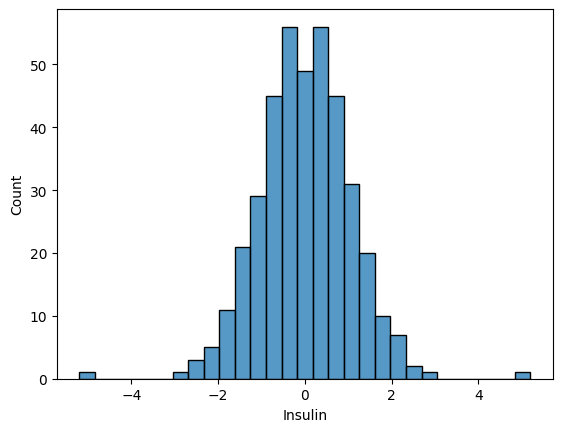

In [73]:
#after transform the column distribution looks fine
sns.histplot(data=df_copy,x='Insulin')

In [71]:
df_copy['Insulin'].unique

<bound method Series.unique of 0           NaN
1           NaN
2           NaN
3     -0.409903
4      0.456571
         ...   
763    0.568416
764         NaN
765   -0.156907
766         NaN
767         NaN
Name: Insulin, Length: 768, dtype: float64>

In [74]:
#Change the nan value to mean value
df_copy['Insulin']=df_copy['Insulin'].fillna(df_copy['Insulin'].mean())


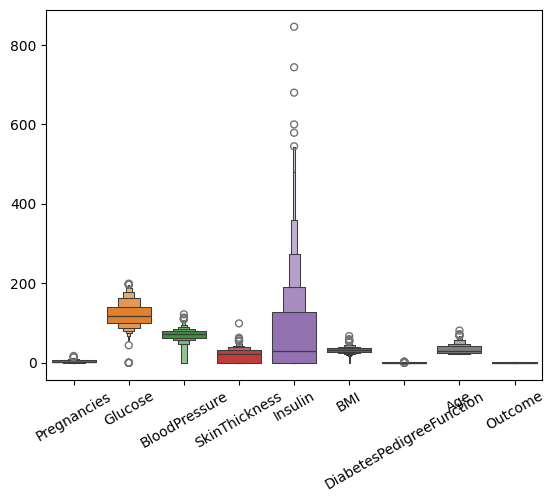

In [84]:
#check the outliers
sns.boxenplot(df)
plt.xticks(rotation=30)
plt.show()

##Glucose and Insulin ar having some outliers,so need to impute it

In [97]:
#find the outlier
df_copy['z_score'] = stats.zscore(df_copy['Insulin'])
z_score_threshold = 2
outliers = df_copy[np.abs(df_copy['z_score']) > z_score_threshold]
len(outliers)


65

#only 10 recrd are of outliers so can be drop it,but here we are imputing so that it retains some info

In [79]:
# Calculate the median of the column excluding outliers
mean_value = df_copy[np.abs(df_copy['z_score']) <= z_score_threshold]['Insulin'].mean()
#impute with median value
df_copy.loc[np.abs(df_copy['z_score']) > z_score_threshold, 'Insulin'] = mean_value


In [112]:
df_copy = df_copy.drop(columns=['z_score'],axis=1)

<Axes: xlabel='Insulin'>

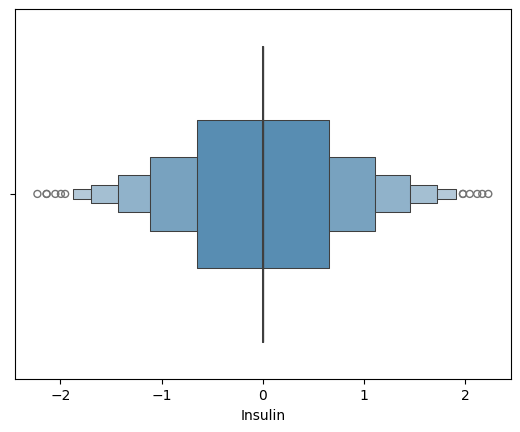

In [106]:
#check the box plot after computing for outliers
sns.boxenplot(data=df_copy,x='Insulin')

In [117]:
df_copy.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [116]:
#change the null values to its mean,mean value
df_copy['BloodPressure']=df_copy['BloodPressure'].fillna(df_copy['BloodPressure'].median())
df_copy['SkinThickness']=df_copy['SkinThickness'].fillna(df_copy['SkinThickness'].mean())
df_copy['BMI']=df_copy['BMI'].fillna(df_copy['BMI'].mean())
df_copy['Glucose']=df_copy['Glucose'].fillna(df_copy['Glucose'].mean())



<Axes: >

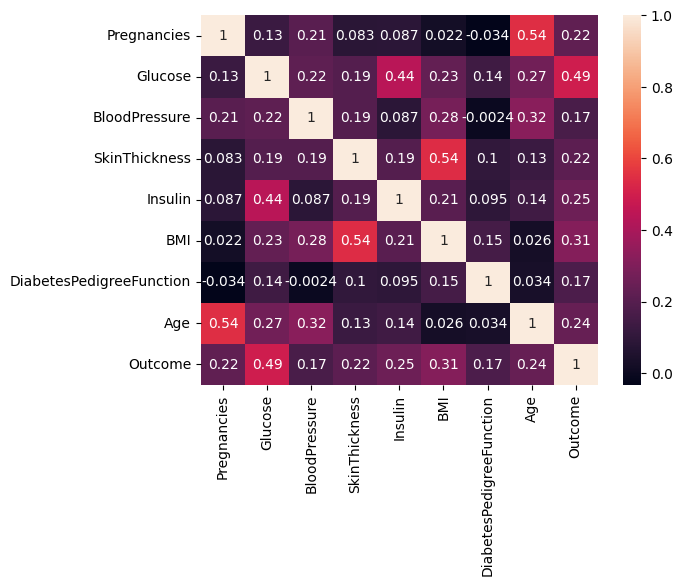

In [119]:
corr_matrix=df_copy.corr()

sns.heatmap(corr_matrix,annot=True,fmt='1.2g')

# corr_matrix=df_copy.corr()
# top_features=corr_matrix.index
# plt.figure(figsize=(10,6))
# sns.heatmap(df[top_features].corr(),annot=True,fmt='1.2g')

In [120]:
plt.figure(figsize=(14,8))

g=sns.heatmap(df[top_features].corr(), vmin=df.corr().values.min(), 
              vmax=1, square=True, cmap="YlGnBu", linewidths=0.1, 
              annot=True, annot_kws={"fontsize":8},
              xticklabels=1, yticklabels=1) 

g.set_xticklabels(g.get_xticklabels(), fontsize = 7)
g.set_yticklabels(g.get_yticklabels(), rotation = 0, fontsize = 10)
plt.show()

NameError: name 'top_features' is not defined

<Figure size 1400x800 with 0 Axes>